 ## Setting up: Install required packages

In [1]:
import sklearn

In [2]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


In [3]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install simple_colors

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install export_graphviz

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement export_graphviz (from versions: none)
ERROR: No matching distribution found for export_graphviz


In [8]:
import os
import math
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
from termcolor import colored
from simple_colors import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.model_selection import cross_val_score
import random

In [9]:

import seaborn as sns

In [10]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')

 ## Exploratory data analysis(EDA)

In [14]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [15]:
df.shape

(1030, 9)

In [16]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [17]:
df.columns = ['Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','age','Concrete_compressive_strength']

In [18]:
df.dtypes

Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine_Aggregate                   float64
age                                int64
Concrete_compressive_strength    float64
dtype: object

In [19]:
df.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
age                              0
Concrete_compressive_strength    0
dtype: int64

In [20]:
summery=df.describe().transpose()
print(summery)

                                count        mean         std         min  \
Cement                         1030.0  281.165631  104.507142  102.000000   
Blast_Furnace_Slag             1030.0   73.895485   86.279104    0.000000   
Fly_Ash                        1030.0   54.187136   63.996469    0.000000   
Water                          1030.0  181.566359   21.355567  121.750000   
Superplasticizer               1030.0    6.203112    5.973492    0.000000   
Coarse_Aggregate               1030.0  972.918592   77.753818  801.000000   
Fine_Aggregate                 1030.0  773.578883   80.175427  594.000000   
age                            1030.0   45.662136   63.169912    1.000000   
Concrete_compressive_strength  1030.0   35.817836   16.705679    2.331808   

                                      25%         50%          75%  \
Cement                         192.375000  272.900000   350.000000   
Blast_Furnace_Slag               0.000000   22.000000   142.950000   
Fly_Ash            

###  Exploration of intercorrelated variables

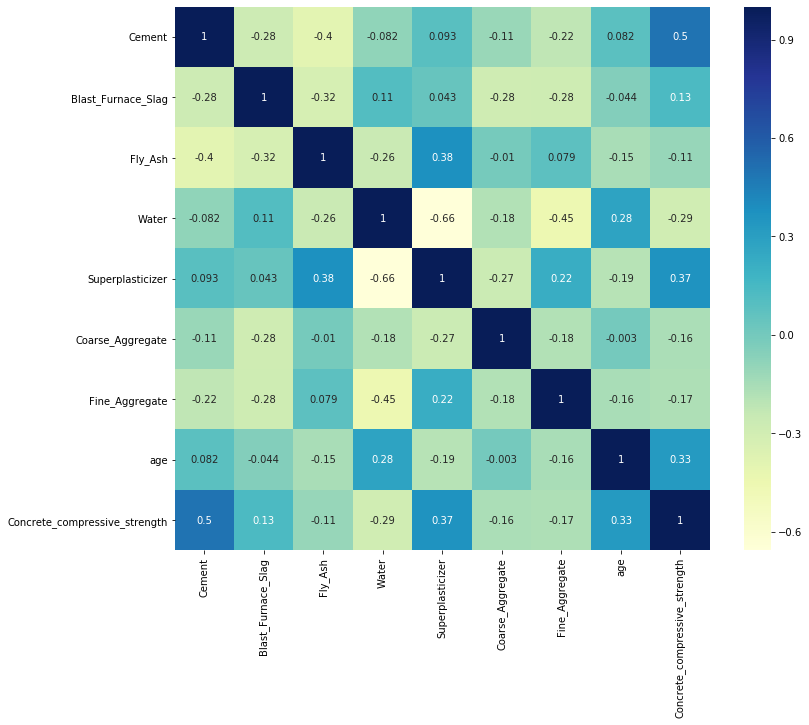

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [22]:
cor_target = df.corr()['Concrete_compressive_strength']
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
print(relevant_features)

Cement                           0.497833
Superplasticizer                 0.366102
age                              0.328877
Concrete_compressive_strength    1.000000
Name: Concrete_compressive_strength, dtype: float64


In [23]:
y = df['Concrete_compressive_strength']
X = pd.get_dummies(df[['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer','Coarse_Aggregate', 'Fine_Aggregate', 'age']], drop_first=True)

## Decision Tree Regression

In [24]:
# RMSE

def RMSE(yT,yPr):
    rms = np.sqrt(mean_squared_error(yT, yPr))
    return rms

In [25]:
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=10)

### The best method for choosing the number of max features

In [26]:
#Choosing the number of max features

max=['auto','sqrt','log2']
rmse_m=[]
I_mse=[]
for i in range(len(max)):
        I_mse=[]
        for trainIndex, textIndex in kf.split(X,y):            
            X_train, xTest = X.iloc[trainIndex], X.iloc[textIndex]           
            y_train, yTest = y.iloc[trainIndex], y.iloc[textIndex]            
            regress_m = DecisionTreeRegressor(random_state=10,max_features=max[i])              
            regress_m.fit(X_train, y_train)            
            yPred_m = regress_m.predict(xTest)            
            I_mse.append(RMSE(yTest, yPred_m))
        print(f'When the number of features is:{max[i]}')
        print(f'Decision Tree 5-fold cross validation RMSE: {np.mean(I_mse)}\n')
        rmse_m.append(np.mean(I_mse))


When the number of features is:auto
Decision Tree 5-fold cross validation RMSE: 6.266917404417177

When the number of features is:sqrt
Decision Tree 5-fold cross validation RMSE: 7.628822457107246

When the number of features is:log2
Decision Tree 5-fold cross validation RMSE: 6.885061880375288



Text(0, 0.5, 'RMSE')

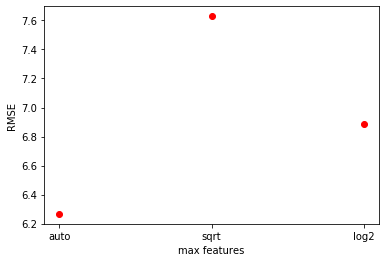

In [27]:
# minimum RMSE is given by auto
plt.plot(max,rmse_m,'ro')
plt.xlabel("max features")
plt.ylabel("RMSE")

### The best choice of ccp_alpha

In [28]:
#Best value for ccp_alpha (the pruning parameter)
ccp_a=np.array(pd.Series(np.arange(0,1,0.001)))
rmse_a=[]
depth_a=[]
for i in range(len(ccp_a)):
        I_mse_a=[]
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)
        regress_a = DecisionTreeRegressor(random_state=10,max_features='auto',ccp_alpha=ccp_a[i])  
        regress_fit_a=regress_a.fit(X_train, y_train)
        cv_scores_a = cross_val_score(regress_fit_a, X_train, y_train, cv = 5)
        errors_a = np.sum(-cross_val_score(regress_fit_a, 
                                     X_train, 
                                     y_train, 
                                     scoring='neg_mean_squared_error', 
                                     cv=5, 
                                     n_jobs=-1))
        
        
        depth_a.append(regress_a.tree_.max_depth)
        rmse_a.append(np.sqrt(errors_a))

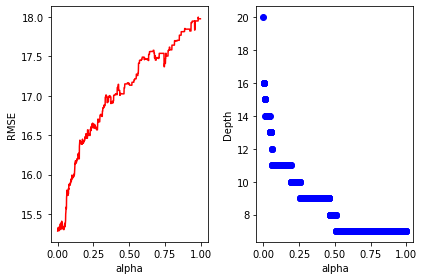

In [29]:
plt.subplot(1, 2, 1)
plt.plot(ccp_a,rmse_a,'r-')
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.subplot(1, 2, 2)
plt.plot(ccp_a,depth_a,'bo')
plt.xlabel("alpha")
plt.ylabel("Depth")
plt.tight_layout()

### Graphical representation of the best tree

In [30]:
#Graphical display the best tree
from sklearn import tree
regress_b = DecisionTreeRegressor(random_state=10,max_features='auto',ccp_alpha=0.001) 
regress_fit_b=regress_b.fit(X_train, y_train)
tree.export_graphviz(regress_fit_b)


'digraph Tree {\nnode [shape=box] ;\n0 [label="X[7] <= 21.0\\nmse = 282.265\\nsamples = 824\\nvalue = 36.101"] ;\n1 [label="X[4] <= 8.335\\nmse = 155.547\\nsamples = 254\\nvalue = 23.777"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 434.0\\nmse = 81.188\\nsamples = 166\\nvalue = 18.22"] ;\n1 -> 2 ;\n3 [label="X[7] <= 10.5\\nmse = 43.691\\nsamples = 151\\nvalue = 16.503"] ;\n2 -> 3 ;\n4 [label="X[6] <= 758.295\\nmse = 33.811\\nsamples = 122\\nvalue = 14.782"] ;\n3 -> 4 ;\n5 [label="X[0] <= 310.7\\nmse = 34.608\\nsamples = 36\\nvalue = 19.259"] ;\n4 -> 5 ;\n6 [label="X[0] <= 207.1\\nmse = 25.672\\nsamples = 27\\nvalue = 17.31"] ;\n5 -> 6 ;\n7 [label="X[4] <= 4.04\\nmse = 18.985\\nsamples = 8\\nvalue = 13.243"] ;\n6 -> 7 ;\n8 [label="X[7] <= 5.0\\nmse = 15.477\\nsamples = 7\\nvalue = 12.361"] ;\n7 -> 8 ;\n9 [label="X[6] <= 704.35\\nmse = 5.792\\nsamples = 3\\nvalue = 9.751"] ;\n8 -> 9 ;\n10 [label="X[6] <= 661.3\\nmse = 1.768\\nsamples = 2\\nvalue =

In [31]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Jishan/Anaconda3/Library/bin/graphviz/'

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [33]:
import graphviz
feat_names = X.columns
targ_names=y
data = export_graphviz(regress_fit_b,out_file=None,feature_names=feat_names,class_names=None,   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph
graph.render("Dtree",view = True)

'Dtree.pdf'

### The feature importance

In [34]:
mapped=zip(regress_b.feature_importances_, X.columns)
mapped = set(mapped)
sortedList = sorted(mapped)[::-1]
sortedList[:-1]

[(0.33531843626254554, 'age'),
 (0.29367487721665525, 'Cement'),
 (0.11314670865075693, 'Water'),
 (0.09999513221876345, 'Superplasticizer'),
 (0.05376624785860837, 'Blast_Furnace_Slag'),
 (0.043073852577914046, 'Fine_Aggregate'),
 (0.037781138994497594, 'Fly_Ash')]

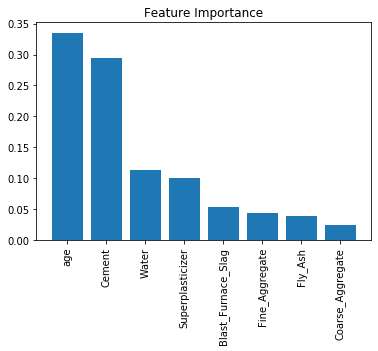

In [35]:
#Variable importance
importances_b = regress_b.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances_b)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances_b[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

## Random Forest Regression

### The best method for choosing the number of max features

In [36]:
#Choosing the number of max features (ccp alpha and n_estimators kept default)

max_rf=['auto','sqrt','log2']
rf_rmse=[]

for i in range(len(max)):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)
        regress_rf = RandomForestRegressor(random_state=10,max_features=max[i],ccp_alpha=0.0,n_estimators=10)  
        regress_fit_rf=regress_rf.fit(X_train, y_train)
        cv_scores_rf = cross_val_score(regress_fit_rf, X_train, y_train, cv = 5)
        errors_rf = np.sum(-cross_val_score(regress_fit_rf, 
                                     X_train, 
                                     y_train, 
                                     scoring='neg_mean_squared_error', 
                                     cv=5, 
                                     n_jobs=-1))
        
        
        rf_rmse.append(np.sqrt(errors_rf))

Text(0, 0.5, 'RMSE')

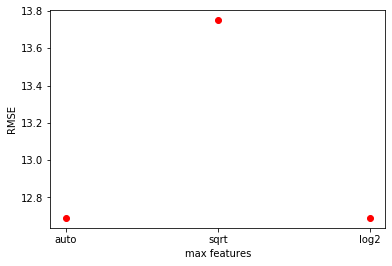

In [37]:
# minimum RMSE is given by auto
plt.plot(max_rf,rf_rmse,'ro')
plt.xlabel("max features")
plt.ylabel("RMSE")

### The best choice of ccp_alpha

In [38]:
#Best value for ccp_alpha (the pruning parameter) max_features='auto', n_estimators=10
rf_ccp_a=np.array(pd.Series(np.arange(0,1,0.001)))
rf_rmse_a=[]
rf_depth_a=[]
for i in range(len(rf_ccp_a)):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)
        regress_rf_a = RandomForestRegressor(random_state=10,max_features='auto',ccp_alpha=rf_ccp_a[i],n_estimators=10)  
        regress_fit_rf_a=regress_rf_a.fit(X_train, y_train)
        cv_scores_rf_a = cross_val_score(regress_fit_rf_a, X_train, y_train, cv = 5)
        errors_rf_a = np.sum(-cross_val_score(regress_fit_rf_a, 
                                     X_train, 
                                     y_train, 
                                     scoring='neg_mean_squared_error', 
                                     cv=5, 
                                     n_jobs=-1))
        rf_max_depth = list()
        for tree in regress_fit_rf_a.estimators_:
            rf_max_depth.append(tree.tree_.max_depth)

        rf_depth_a.append(np.mean(rf_max_depth))
        rf_rmse_a.append(np.sqrt(errors_rf_a))

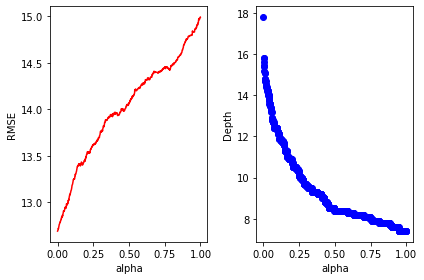

In [39]:
plt.subplot(1, 2, 1)
plt.plot(rf_ccp_a,rf_rmse_a,'r-')
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.subplot(1, 2, 2)
plt.plot(rf_ccp_a,rf_depth_a,'bo')
plt.xlabel("alpha")
plt.ylabel("Depth")
plt.tight_layout()

### The optimal number of estimators

In [40]:
# Optimal number of estimators, up to 100
#ccp_alpha=0.999 ,max_features='auto'
n_est=np.array(pd.Series(np.arange(1,100,1)))
rf3_rmse=[]
for i in range(len(n_est)):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)
        regress_op = RandomForestRegressor(random_state=10,max_features='auto',ccp_alpha=0.001,n_estimators=n_est[i])  
        regress_fit_op=regress_op.fit(X_train, y_train)
        cv_scores_op = cross_val_score(regress_fit_op, X_train, y_train, cv = 5)
        errors_op = np.sum(-cross_val_score(regress_fit_op, 
                                     X_train, 
                                     y_train, 
                                     scoring='neg_mean_squared_error', 
                                     cv=5, 
                                     n_jobs=-1))

        rf3_rmse.append(np.sqrt(errors_op))

Text(0, 0.5, 'RMSE')

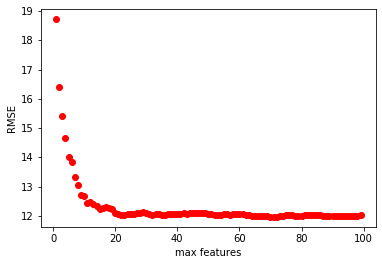

In [41]:
# minimum RMSE is given by auto
plt.plot(n_est,rf3_rmse,'ro')
plt.xlabel("max features")
plt.ylabel("RMSE")

### The feature importance

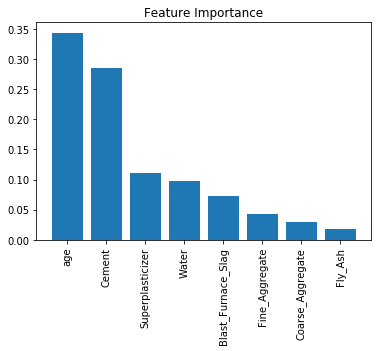

In [42]:
#Variable importance
regress_opt = RandomForestRegressor(random_state=10,max_features='auto',ccp_alpha=0.001,n_estimators=70)
regress_fit_opt=regress_opt.fit(X_train, y_train)

mapped_rf=zip(regress_opt.feature_importances_, X.columns)
mapped_rf = set(mapped_rf)
sortedList = sorted(mapped_rf)[::-1]
sortedList[:-1]

importances_opt = regress_opt.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances_opt)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances_opt[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

## Identifying the best model

### Decision Tree Regression

In [57]:
best_dtree = DecisionTreeRegressor(random_state=10,max_features='auto',ccp_alpha=0.001)

In [58]:
rmse_best_dtree = cross_val_score(best_dtree, X, y, scoring='neg_root_mean_squared_error', cv=5)

In [59]:
print(f'SKlearn SGD 5-fold cross validation RMSE for the best decision tree model : {-rmse_best_dtree.mean()}')

SKlearn SGD 5-fold cross validation RMSE for the best decision tree model : 11.733108292849263


### Random Forest Regression

In [61]:
best_rftree= RandomForestRegressor(random_state=10,max_features='auto',ccp_alpha=0.001,n_estimators=70)

In [62]:
rmse_best_rftree = cross_val_score(best_rftree, X, y, scoring='neg_root_mean_squared_error', cv=5)

In [63]:
print(f'SKlearn SGD 5-fold cross validation RMSE for the best random forest model : {-rmse_best_rftree.mean()}')

SKlearn SGD 5-fold cross validation RMSE for the best random forest model : 10.207106391725006


## Hyperparameter Tuning using Scikit-learn GridSearchCV

### Decision Tree Regression

In [43]:
Dtree= DecisionTreeRegressor()

In [44]:
parameter_space = {'max_features': ['auto', 'sqrt', 'log2'],
                   'ccp_alpha': np.arange(0, 1, 0.001).tolist()
                 }

In [45]:
#print(parameter_space)

In [46]:
clf_tree = GridSearchCV(Dtree, parameter_space,cv=5)

In [47]:
clf=clf_tree.fit(X,y)

In [48]:
print("Best Score: {}".format(clf.best_score_))
print("Best params: {}".format(clf.best_params_))

Best Score: 0.41110735360357753
Best params: {'ccp_alpha': 0.448, 'max_features': 'log2'}


In [64]:
gs_regress = DecisionTreeRegressor(random_state=10,max_features='log2',ccp_alpha=0.448) 

In [66]:
rmse_regrbest_gs = cross_val_score(gs_regress, X, y, scoring='neg_root_mean_squared_error', cv=5)

In [67]:
print(f'SKlearn SGD 5-fold cross validation RMSE for the optimal model : {-rmse_regrbest_gs.mean()}')

SKlearn SGD 5-fold cross validation RMSE for the optimal model : 13.338243988912193


### Random Forest Regression .......still running!

In [52]:
rftree=  RandomForestRegressor()


In [53]:
parameter_space_rf = {'max_features': ['auto', 'sqrt', 'log2'],
                   'n_estimators': np.arange(1,100,1).tolist(),
                   'ccp_alpha': np.arange(0, 1, 0.001).tolist()
                 }

In [54]:
clf_tree_rf = GridSearchCV(rftree, parameter_space_rf,cv=5)

In [56]:
#clf_rf=clf_tree_rf.fit(X,y)

In [ ]:
print("Best Score: {}".format(clf_rf.best_score_))
print("Best params: {}".format(clf_rf.best_params_))

In [ ]:
gs_regress_rf = DecisionTreeRegressor(random_state=10,max_features='log2',ccp_alpha= 0.327) 

In [ ]:
rmse_regrbest_gs_rf = cross_val_score(gs_regress_rf, X, y, scoring='neg_root_mean_squared_error', cv=5)

In [ ]:
print(f'SKlearn SGD 5-fold cross validation RMSE for the optimal model : {-rmse_regrbest_gs_rf.mean()}')